In [1]:
import json
import pandas as pd
import datetime as dt
from imdb import IMDb
from imdb import helpers
ia = IMDb()

## User Defined Config

In [2]:
# Must be a list of TV series to plot
titles = ['0096697', '0182576', '0121955', '2861424']

## Extract the Data

In [3]:
start = dt.datetime.now()
series = [ia.get_movie(t) for t in titles]

end = dt.datetime.now()
print(f'Time elapsed: {end - start}')

Time elapsed: 0:00:12.242350


In [4]:
start = dt.datetime.now()
for s in series:
    ia.update(s, 'episodes')

end = dt.datetime.now()
print(f'Time elapsed: {end - start}')

Time elapsed: 0:01:12.535367


### Inspect...

In [5]:
# The Simpsons S01E02
for k in series[0]['episodes'][1][2].keys():
    print(f"{k}: {series[0]['episodes'][1][2][k]}")

title: Bart the Genius
kind: episode
episode of: The Simpsons (TV Series 1989– )
season: 1
episode: 2
rating: 7.8
votes: 2796
original air date: 14 Jan. 1990
year: 1990
plot: 
    Bart ends up at a school for gifted children after cheating on an IQ test.    
canonical title: Bart the Genius
long imdb title: "The Simpsons (TV Series 1989– )" Bart the Genius (1990)
long imdb canonical title: "Simpsons (TV Series 1989– ), The" Bart the Genius (1990)
smart canonical title: Bart the Genius
smart long imdb canonical title: "Simpsons (TV Series 1989– ), The" Bart the Genius (1990)
long imdb episode title: "The Simpsons (TV Series 1989– )" Bart the Genius (1990)
series title: The Simpsons (TV Series 1989– )
canonical series title: Simpsons (TV Series 1989– ), The
episode title: Bart the Genius
canonical episode title: Bart the Genius
smart canonical series title: Simpsons (TV Series 1989– ), The
smart canonical episode title: Bart the Genius


In [6]:
# Family Guy S04E05
for k in series[1]['episodes'][4][5].keys():
    print(f"{k}: {series[1]['episodes'][4][5][k]}")

title: The Cleveland-Loretta Quagmire
kind: episode
episode of: Family Guy (TV Series 1998– )
season: 4
episode: 5
rating: 7.6
votes: 1102
original air date: 12 Jun. 2005
year: 2005
plot: 
    Cleveland's wife Loretta has an affair with Quagmire.    
canonical title: Cleveland-Loretta Quagmire, The
long imdb title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
long imdb canonical title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
smart canonical title: Cleveland-Loretta Quagmire, The
smart long imdb canonical title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
long imdb episode title: "Family Guy (TV Series 1998– )" The Cleveland-Loretta Quagmire (2005)
series title: Family Guy (TV Series 1998– )
canonical series title: Family Guy (TV Series 1998– )
episode title: The Cleveland-Loretta Quagmire
canonical episode title: Cleveland-Loretta Quagmire, The
smart canonical series title: Family Guy (TV Series 1998– )
sm

In [7]:
## TODO: refactor this...

ratings = []
dates = []
votes = []
plots = []
titles = []

c = 0
for s in series: 
    episodes = helpers.sortedEpisodes(s)
    ratings.append([])
    dates.append([])
    votes.append([])
    plots.append([])
    titles.append([])
    for e in episodes:        
        try:
            ratings[c].append(e['rating'])
        except KeyError:
            print(f'problem reading rating: for {s}, {e}')
            continue
            
        try:
            timestamp = dt.datetime.strptime(e['original air date'] , "%d %b %Y")
            dates[c].append(timestamp)
        except KeyError:
            print(f'problem reading timestamp: for {s}, {e}')
            ratings[c].pop()
            continue
        except ValueError:
            try:
                timestamp = dt.datetime.strptime(e['original air date'] , "%d %b. %Y")
                dates[c].append(timestamp)
            except:
                print(f'problem reading timestamp: for {s}, {e}')
                ratings[c].pop()
                
    c = c + 1

problem reading rating: for The Simpsons, I'm Just a Girl Who Can't Say D'oh
problem reading rating: for The Simpsons, I'm Dancing as Fat as I Can
problem reading rating: for The Simpsons, The Clown Stays in the Picture
problem reading rating: for The Simpsons, Episode #30.15
problem reading rating: for The Simpsons, Episode #30.16
problem reading rating: for The Simpsons, Episode #30.17
problem reading rating: for The Simpsons, Episode #30.18
problem reading rating: for The Simpsons, Episode #30.19
problem reading rating: for The Simpsons, Episode #30.22
problem reading timestamp: for Family Guy, Family Guy
problem reading rating: for Family Guy, Bri, Robot
problem reading rating: for Family Guy, Trans-Fat
problem reading rating: for Family Guy, Episode #17.14
problem reading rating: for Family Guy, Episode #17.15
problem reading rating: for Family Guy, Episode #17.16
problem reading rating: for Family Guy, Episode #17.17
problem reading rating: for Family Guy, Episode #17.18
problem 

In [8]:
len(dates[1]), len(ratings[1])

(320, 320)

## Plots

In [9]:
import matplotlib.pyplot as plt

C:\tools\Anaconda3\envs\pythondata\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


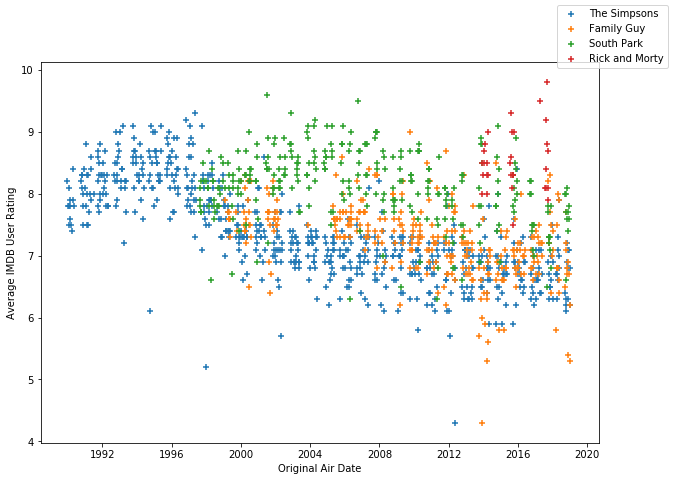

In [10]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

for i in range(len(series)):
    ax.scatter(dates[i], ratings[i], label=series[i]['title'], marker='+')
    
ax.set_xlabel('Original Air Date')
ax.set_ylabel('Average IMDB User Rating')

fig.legend()
fig.show()